In [51]:
import numpy as np   #NumPy is a powerful library for numerical computing in Python. It provides a wide range of mathematical functions and efficient data structures, such as arrays and matrices, that are particularly useful for working with numerical data.
import pandas as pd  #Pandas is a versatile library for data manipulation and analysis. It introduces two main data structures, Series (1-dimensional labeled array) and DataFrame (2-dimensional labeled data table), that make it easy to perform various operations on structured data.
import matplotlib.pyplot as plt  #Matplotlib is a widely used library for creating visualizations in Python. It offers a flexible and comprehensive set of plotting functions to generate a wide range of plots, including line plots, scatter plots, bar plots, histograms, and more.

In [52]:
training_set = pd.read_csv('GoogleStockPrice_Train.csv')
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [53]:
training_set.shape

(1258, 6)

In [54]:
training_set.isnull().sum() 
#The isnull() function returns a DataFrame of the same shape as training_set, where each cell contains a Boolean value indicating whether it is null (True) or not null (False).
#By chaining the sum() function after isnull(), it calculates the sum of null values across each column. 

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [55]:
training_set.duplicated().sum()                

0

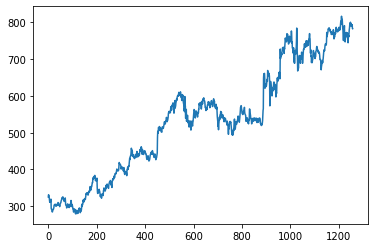

In [56]:
plt.plot(training_set['Open'])
plt.show()

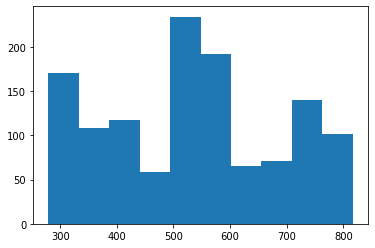

In [57]:
plt.hist(training_set['Open'])
plt.show()

In [58]:
training_set = training_set.iloc[:, 1:2].values
training_set
#The code you provided training_set = training_set.iloc[:, 1:2].values selects a subset of the training_set DataFrame containing only the values from the column at index 1 (column 2) and converts it to a NumPy array.

#The .iloc indexer is used to select specific rows and columns by integer location. In this case, [:, 1:2] selects all rows (:) and the column at index 1 (column 2). The resulting subset of the DataFrame is then assigned to the training_set variable.

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [59]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

#The MinMaxScaler class is a popular feature scaling technique in machine learning that transforms the data to a specific range, usually between 0 and 1. It is commonly used to normalize numerical data before feeding it into machine learning algorithms.

In [60]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [68]:
X_train= training_set[0:1257]
y_train= training_set[1:1258]
X_train=np.reshape(X_train, (1257 , 1 , 1))

In [70]:
from keras.models import Sequencial
from keras.layers import Dense,LSTM

ImportError: cannot import name 'Sequencial' from 'keras.models' (C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\models\__init__.py)

In [64]:
regressor = Sequential()
regressor.add(LSTM(units=50, activation='sigmoid',
 return_sequences=True, input_shape=(None, 1)))
regressor.add(LSTM(units=50, activation='sigmoid',
 return_sequences=True, input_shape=(None, 1)))
regressor.add(Dense(units=1))

NameError: name 'Sequential' is not defined

In [65]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

NameError: name 'regressor' is not defined

In [66]:
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

NameError: name 'regressor' is not defined

In [51]:
test_set = pd.read_csv('GoogleStockPriceTest.csv')
real_stock_price = test_set.iloc[:, 1:2].values

In [52]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [53]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [54]:
inputs

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [55]:
inputs = np.reshape(inputs, (20, 1, 1))

In [56]:
predicted_stock_price = regressor.predict(inputs)

1/1 [==============================] - 1s 664ms/step


In [27]:
predicted_stock_price

array([[[0.93072456]],

       [[0.94753224]],

       [[0.94352657]],

       [[0.9596282 ]],

       [[0.9790703 ]],

       [[0.9816102 ]],

       [[0.9766329 ]],

       [[0.9803579 ]],

       [[0.98094934]],

       [[0.9802535 ]],

       [[0.9780432 ]],

       [[0.9768419 ]],

       [[0.9799577 ]],

       [[0.9805492 ]],

       [[1.0066288 ]],

       [[1.0192382 ]],

       [[1.0332873 ]],

       [[1.027977  ]],

       [[0.9934153 ]],

       [[0.9624272 ]]], dtype=float32)

In [28]:
pred_price = np.reshape(predicted_stock_price, (20, 1))

In [29]:
pred_price = sc.inverse_transform(pred_price)

In [30]:
pred_price

array([[779.4403 ],
       [788.47546],
       [786.32214],
       [794.9777 ],
       [805.429  ],
       [806.7944 ],
       [804.1188 ],
       [806.12115],
       [806.43915],
       [806.06506],
       [804.8769 ],
       [804.23114],
       [805.906  ],
       [806.224  ],
       [820.24335],
       [827.02167],
       [834.5739 ],
       [831.7193 ],
       [813.1403 ],
       [796.48236]], dtype=float32)

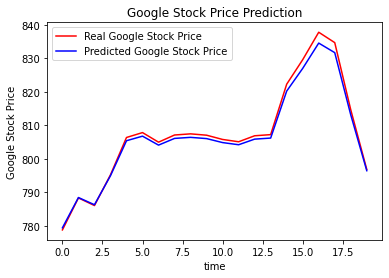

In [31]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot(pred_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()